In [1]:
from mpl_toolkits.mplot3d import Axes3D
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16.8,6.72
rcParams['savefig.transparent'] = True
import math
import sklearn
from sklearn.preprocessing import MinMaxScaler
import sklearn
from scipy.stats import zscore
import somoclu
import seaborn
#import Orange
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent
from Orange.projection.pca import PCA
from scipy.cluster.hierarchy import fcluster
from sklearn.utils import shuffle
from sklearn.neighbors.kde import KernelDensity
from time import time
import sompy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import scipy

C:\Anaconda2\envs\py36\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
filedata_lte= 'D:/Development/henrique/weekly_lte_users_by_cell.csv'
filedata_umts= 'D:/Development/henrique/weekly_umts_users_by_cell2.csv'
#filedata= 'D:/Development/mestrado/uma/dataset/raw_callsinfo.csv'
df_umts = pd.read_csv(filedata_umts, engine='python', sep=';')
df_lte = pd.read_csv(filedata_lte, engine='python', sep=';')
df_umts.head()

,year,week,cidade,rnc,cellid,hsdpa_users
0,2017,28,BELO HORIZONTE,RNCMG08,64836,3.597714
1,2017,28,SALVADOR,RNCBA05,61195,8.873714
2,2017,28,SALVADOR,RNCBA05,60024,4.760857
3,2017,28,SALVADOR,RNCBA05,60993,1.045571
4,2017,28,BELO HORIZONTE,RNCMG08,23833,7.419000


In [4]:
df_lte.head()

,year,week,cidade,enodeb,cellid,lte_users
0,2017,28,RECIFE,EPEEPH39,5,26.037571
1,2017,28,CURITIBA,EPRCSF68,1,9.781429
2,2017,28,CURITIBA,EPRCCJA5,6,2.501857
3,2017,28,BELO HORIZONTE,EMGOUP07,1,22.246000
4,2017,28,BELO HORIZONTE,EMGPAM34,4,20.675572


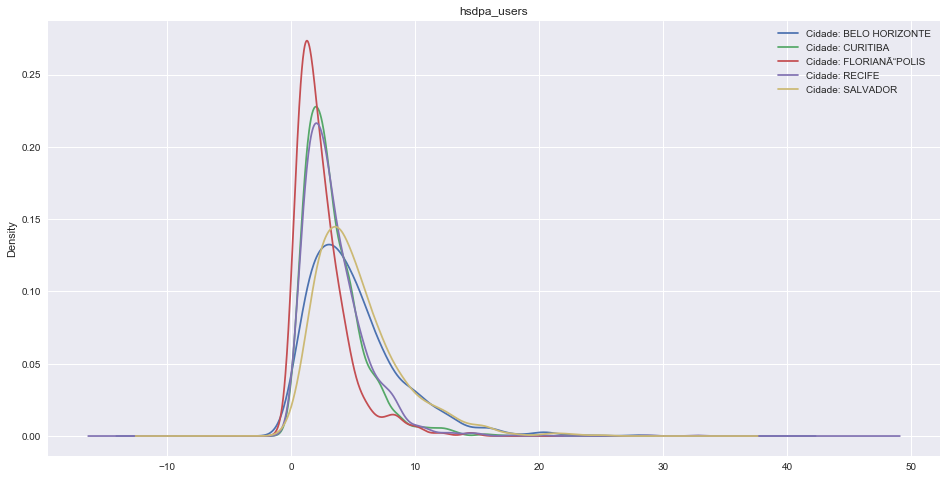

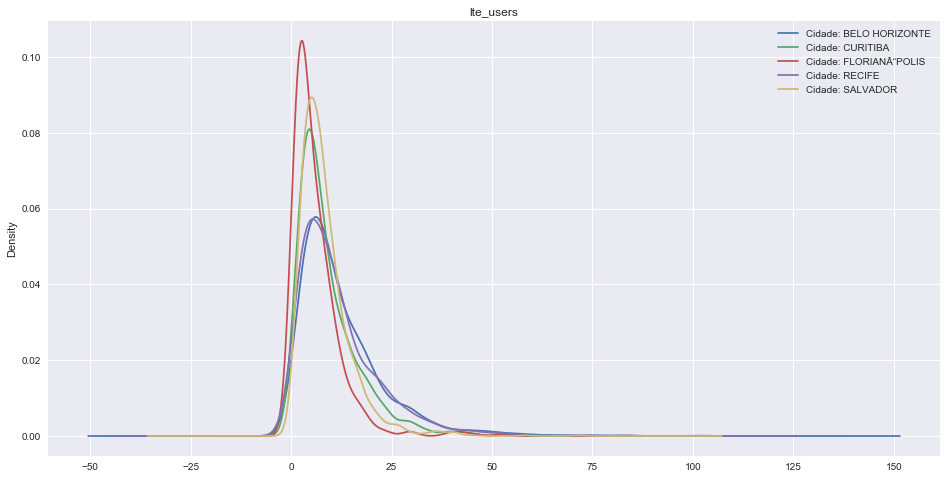

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
# Defines a coluor for each line
#colours = ['c', 'crimson', 'chartreuse','r','b','g','b'] 

# Defines a marker for each line
#markers = ['o', 'v', '*','-','o','o','v']
#i=0
for label, valor in df_umts.groupby('cidade')[["hsdpa_users"]]:
    valor["hsdpa_users"].plot(kind="kde", ax=ax, label='Cidade: '+str(label))
plt.legend()
plt.title('hsdpa_users')

fig, ax = plt.subplots(figsize=(16,8))
for label, valor in df_lte.groupby('cidade')[["lte_users"]]:
    valor["lte_users"].plot(kind="kde", ax=ax, label='Cidade: '+str(label))
plt.legend()
plt.title('lte_users')

In [9]:
df_umts.groupby(['cidade'])[["hsdpa_users"]].mean().std()


hsdpa_users    1.23653
dtype: float64

In [8]:
df_lte.groupby(['cidade'])[["lte_users"]].mean()

,lte_users
cidade,
BELO HORIZONTE,12.491203
CURITIBA,9.225979
FLORIANÃ“POLIS,6.073749
RECIFE,11.636213
SALVADOR,8.458537


In [12]:
df_umts.describe()["hsdpa_users"]

count    6878.000000
mean        4.169759
std         3.222000
min         0.000000
25%         1.919964
50%         3.353286
75%         5.487464
max        32.709858
Name: hsdpa_users, dtype: float64

In [14]:
df_lte.describe()["lte_users"]

count    6390.000000
mean        9.917003
std         8.839732
min         0.000000
25%         4.089964
50%         7.450857
75%        12.916214
max       100.995430
Name: lte_users, dtype: float64

In [19]:
filedata_lte2= 'D:/Development/henrique/weekly_lte_users_by_cell_nofds.csv'
filedata_umts2= 'D:/Development/henrique/weekly_umts_users_by_cell_nofds.csv'
#filedata= 'D:/Development/mestrado/uma/dataset/raw_callsinfo.csv'
df_umts_sem_fds = pd.read_csv(filedata_umts2, engine='python', sep=';')
df_lte_sem_fds = pd.read_csv(filedata_lte2, engine='python', sep=';')
#df_umts.head()

In [20]:
df_umts_sem_fds.describe()["hsdpa_users"]

count    6876.000000
mean        4.862939
std         3.812188
min         0.000000
25%         2.215625
50%         3.928250
75%         6.428562
max        37.597751
Name: hsdpa_users, dtype: float64

In [21]:
df_lte_sem_fds.describe()["lte_users"]

count    6360.000000
mean        9.884451
std         9.034297
min         0.000000
25%         3.930000
50%         7.344400
75%        12.811200
max       110.229202
Name: lte_users, dtype: float64